Problem Statement:
* How different regions of Brazil saw their gas prices change?
* Within a region, which states increased more their prices?
* Which states are the cheapest (or most expensive) for different types of fuels?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns # seaborn package
import matplotlib.pyplot as plt


/kaggle/input/gas-prices-in-brazil/2004-2019.tsv


In [15]:
df = pd.read_csv('/kaggle/input/gas-prices-in-brazil/2004-2019.tsv',sep='\t', parse_dates=[1,2])
df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [8]:
df.shape

(106823, 21)

In [48]:
df.rename(
    columns={
        "DATA INICIAL": "start_date",
        "DATA FINAL": "end_date",
        "REGIÃO": "region",
        "ESTADO": "state",
        "PRODUTO": "product",
        "NÚMERO DE POSTOS PESQUISADOS": "no_gas_stations",
        "UNIDADE DE MEDIDA": "unit",
        "PREÇO MÉDIO REVENDA": "avg_price",
        "DESVIO PADRÃO REVENDA": "sd_price",
        "PREÇO MÍNIMO REVENDA": "min_price",
        "PREÇO MÁXIMO REVENDA": "max_price",
        "MARGEM MÉDIA REVENDA": "avg_price_margin",
        "ANO": "year",
        "MÊS": "month",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "dist_max_price",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "dist_min_price",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "dist_sd_price",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "dist_avg_price",
        "COEF DE VARIAÇÃO REVENDA": "coef_price"
    },
    inplace=True
)
df.dtypes

start_date          datetime64[ns]
end_date            datetime64[ns]
region                      object
state                       object
product                     object
no_gas_stations              int64
unit                        object
avg_price                  float64
sd_price                   float64
min_price                  float64
max_price                  float64
avg_price_margin            object
coef_price                 float64
dist_avg_price              object
dist_sd_price               object
dist_min_price              object
dist_max_price              object
coef_dist                   object
month                        int64
year                         int64
dtype: object

In [54]:
df

,start_date,end_date,region,state,product,no_gas_stations,unit,avg_price,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.42010,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.50130,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.56140,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.59910,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.74410,1.03170,0.082,5,2004
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.56860,1.35000,0.134,5,2004
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.100,0.068,0.73320,1.29400,0.062,5,2004
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.99230,1.36183,0.082,5,2004
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.75770,1.29720,0.077,5,2004
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.56430,1.35410,0.096,5,2004


In [53]:
for col in ['avg_price_margin', 'dist_avg_price', 'dist_sd_price', 'dist_min_price', 'dist_max_price', 'coef_dist']:
    df[col]=pd.to_numeric(df[col],errors='coerce')
df.dtypes

start_date          datetime64[ns]
end_date            datetime64[ns]
region                      object
state                       object
product                     object
no_gas_stations              int64
unit                        object
avg_price                  float64
sd_price                   float64
min_price                  float64
max_price                  float64
avg_price_margin           float64
coef_price                 float64
dist_avg_price             float64
dist_sd_price              float64
dist_min_price             float64
dist_max_price             float64
coef_dist                  float64
month                        int64
year                         int64
dtype: object

In [83]:
df.query('year!=2019 and product in ["GLV","GNV"]').groupby(['year','region'])['avg_price'].agg('sum')


year  region      
2004  CENTRO OESTE      38.524
      NORDESTE         299.888
      SUDESTE          150.806
      SUL              121.749
2005  CENTRO OESTE      63.905
      NORDESTE         478.748
      NORTE             15.209
      SUDESTE          232.578
      SUL              192.467
2006  CENTRO OESTE     118.839
      NORDESTE         508.651
      NORTE             71.349
      SUDESTE          270.366
      SUL              234.323
2007  CENTRO OESTE     157.710
      NORDESTE         550.951
      NORTE             39.173
      SUDESTE          279.937
      SUL              239.275
2008  CENTRO OESTE     134.403
      NORDESTE         638.690
      NORTE             46.273
      SUDESTE          325.806
      SUL              246.183
2009  CENTRO OESTE     174.044
      NORDESTE         625.657
      NORTE             60.311
      SUDESTE          327.372
      SUL              246.767
2010  CENTRO OESTE     164.460
                        ...   
2013  CENTRO OESTE  

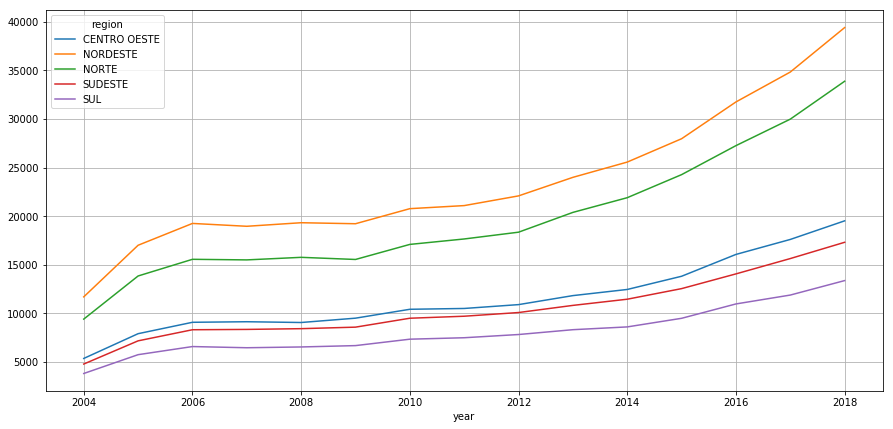

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019').groupby(['year','region']).sum()['avg_price'].unstack().plot(ax=ax)
plt.grid(True)

In [85]:
df.query('year!=2019 and region in ["NORDESTE"]').groupby(['year','state'])['avg_price'].agg('sum')

year  state              
2004  ALAGOAS                1261.541
      BAHIA                  1299.110
      CEARA                  1304.147
      MARANHAO               1292.654
      PARAIBA                1362.776
      PERNAMBUCO             1277.268
      PIAUI                  1360.680
      RIO GRANDE DO NORTE    1251.442
      SERGIPE                1296.334
2005  ALAGOAS                1844.105
      BAHIA                  1861.471
      CEARA                  1888.653
      MARANHAO               1852.827
      PARAIBA                1992.060
      PERNAMBUCO             1821.872
      PIAUI                  1997.647
      RIO GRANDE DO NORTE    1844.942
      SERGIPE                1908.901
2006  ALAGOAS                2116.933
      BAHIA                  2126.026
      CEARA                  2119.281
      MARANHAO               2175.708
      PARAIBA                2198.297
      PERNAMBUCO             2092.100
      PIAUI                  2224.780
      RIO GRANDE DO NORT

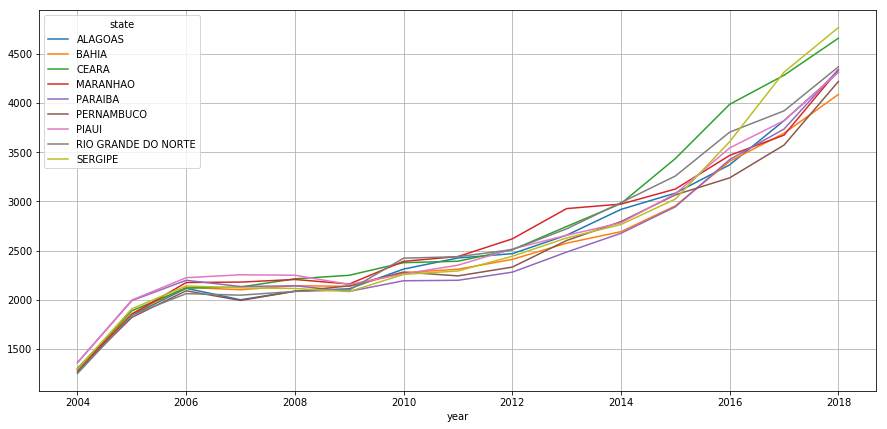

In [86]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019 and region in ["NORDESTE"]').groupby(['year','state']).sum()['avg_price'].unstack().plot(ax=ax)
plt.grid(True)

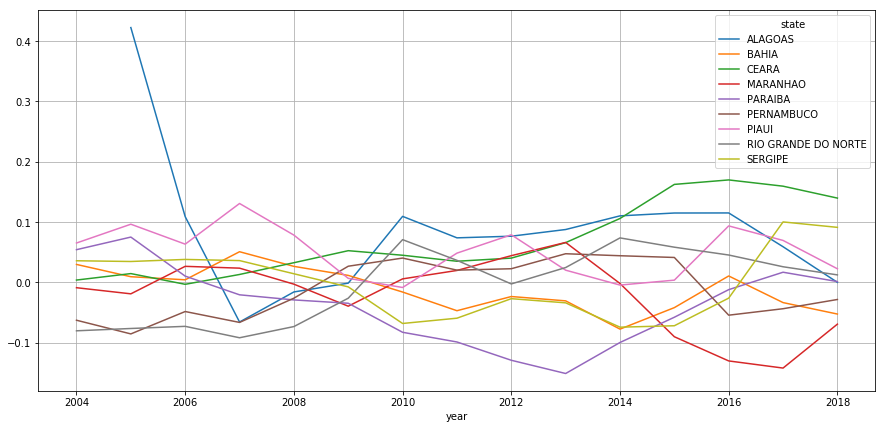

In [87]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019 and region in ["NORDESTE"]').groupby(['year','state']).sum()['avg_price'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

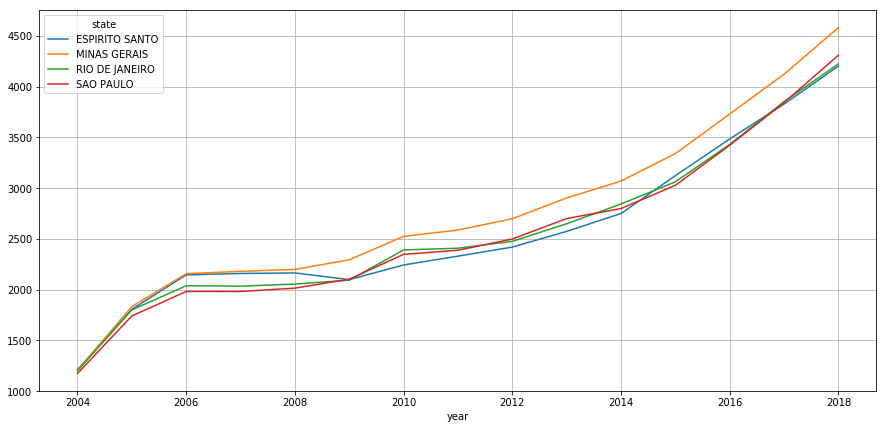

In [88]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019 and region in ["SUDESTE"]').groupby(['year','state']).sum()['avg_price'].unstack().plot(ax=ax)
plt.grid(True)

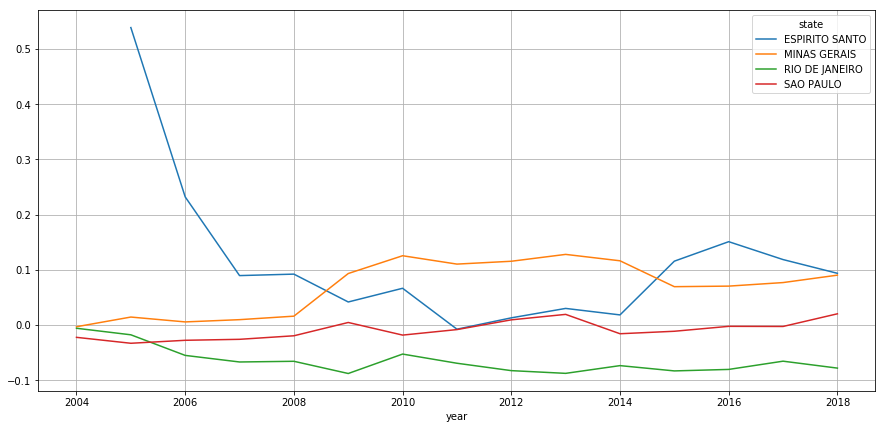

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019 and region in ["SUDESTE"]').groupby(['year','state']).sum()['avg_price'].pct_change().unstack().plot(ax=ax)
plt.grid(True)

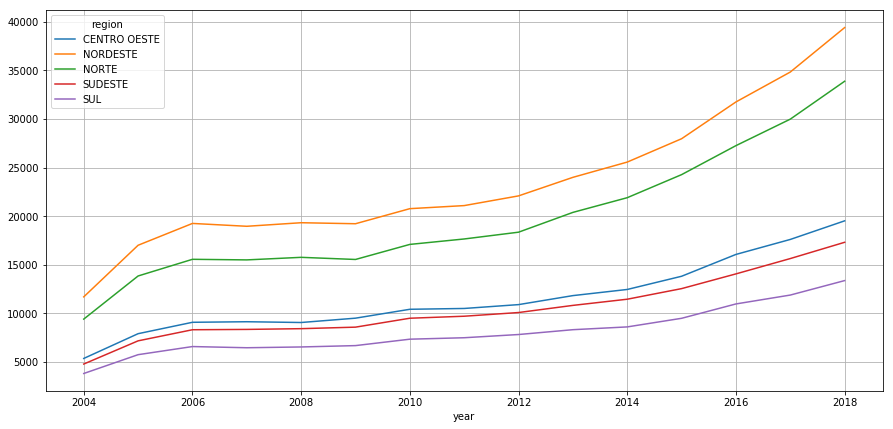

In [91]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019').groupby(['year','region']).sum()['avg_price'].unstack().plot(ax=ax)
plt.grid(True)

In [92]:
df.query('year!=2019').groupby(['year','state','product'])['avg_price'].agg('sum')

year  state             product         
2004  ACRE              ETANOL HIDRATADO      64.625
                        GASOLINA COMUM        86.083
                        GLP                 1298.038
                        ÓLEO DIESEL           62.617
      ALAGOAS           ETANOL HIDRATADO      48.333
                        GASOLINA COMUM        76.000
                        GLP                 1049.951
                        GNV                   37.092
                        ÓLEO DIESEL           50.165
      AMAPA             ETANOL HIDRATADO      64.358
                        GASOLINA COMUM        81.096
                        GLP                 1166.875
                        ÓLEO DIESEL           55.965
      AMAZONAS          ETANOL HIDRATADO      55.674
                        GASOLINA COMUM        76.557
                        GLP                 1047.163
                        ÓLEO DIESEL           55.458
      BAHIA             ETANOL HIDRATADO      53.546
     

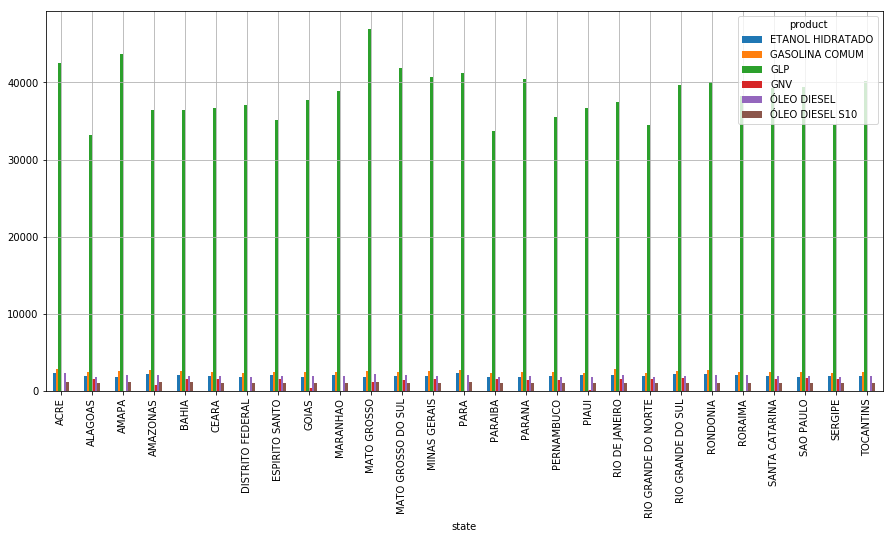

In [102]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019').groupby(['state','product'])['max_price'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)

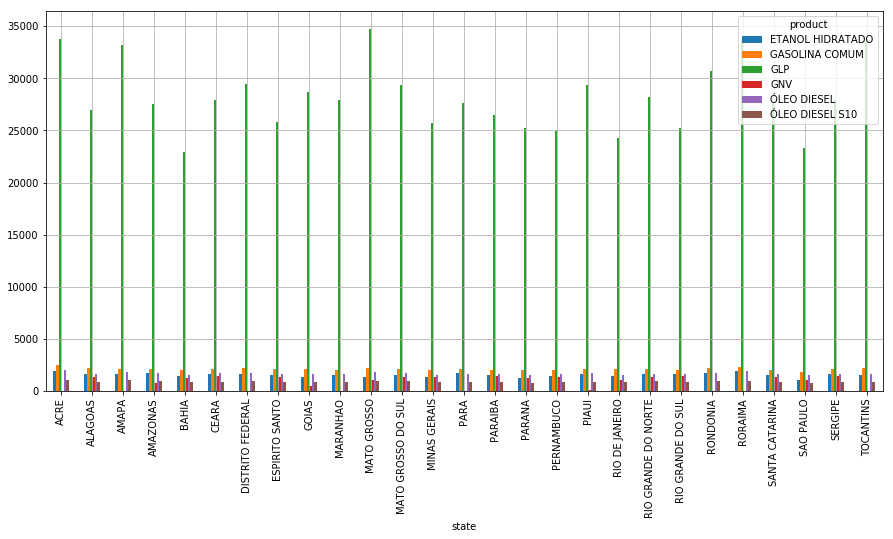

In [103]:
fig, ax = plt.subplots(figsize=(15,7))
df.query('year!=2019').groupby(['state','product'])['min_price'].agg('sum').unstack().plot(kind='bar',ax=ax)
plt.grid(True)